July 23 - Correlation
============
* Correlation
* Linear regression
* Scatter Matrix
* Correlation Matrix

CWK: Compute and plot the correlation matrices for temperature and precipitation (two separate matrices) between New York, Philadelphia, Newark and Boston using the 2005-2015 time record and then visualize them. Then compute the correlation between temperature and precipitation for each city and plot temperature vs. precipitation with the best fit line for the cities with the highest correlation between them.  Submit these graphs and a paragraph discussing whether the timeseries and regional patterns support these correlations, with references back to the graphs and previous work to support your assertions. 


In [3]:

import pandas as pd
import numpy as np

import city
data_path = "C:\\Users\\story645\\Desktop\\EAS213_2015\\571549.csv"
df = pd.read_csv(data_path)
nyc = city.filter_city(df,"NY US")


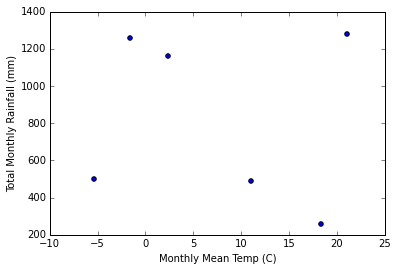

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nyc['MNTM']/10,nyc['TPCP']) #rescale
ax.set_xlabel("Monthly Mean Temp (C)") #Label!
ax.set_ylabel("Total Monthly Rainfall (mm)") 

In [7]:
import scipy.stats as st
#http://pandas.pydata.org/pandas-docs/stable/computation.html
print nyc['MNTM'].corr(nyc['TPCP'])
#http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr
print st.pearsonr(nyc['MNTM'], nyc['TPCP'])

-0.106962078839
(-0.1069620788389032, 0.84016875223335818)


Now compute correlation for:
* total precip vs average precip
* temperature vs. snow depth
* one other variable pair of your choice (2015 dataset)

In [8]:
#linear regressions? 
slope, intercept, _, _, _ = st.linregress(nyc['MNTM'], nyc['TPCP'])
print slope, intercept


-0.452111374194 857.563889759


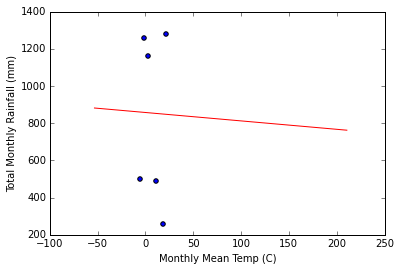

In [12]:
#makes more sense when superimposed on graph:
#Also called plotting a best fit line

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nyc['MNTM']/10,nyc['TPCP'])
ax.set_xlabel("Monthly Mean Temp (C)") #Label!
ax.set_ylabel("Total Monthly Rainfall (mm)") 

#set up a list of a 100 x values between the min and max of MNTM (x-axis)
x = np.linspace(nyc['MNTM'].min(), nyc['MNTM'].max(),100)
#y = mx+b = slope*x+intercept
ax.plot(x, slope*x+intercept, color="red")

